In [22]:
from salishsea_tools import viz_tools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
import cmocean.cm as cm
from IPython import display

In [23]:
# xr.open_dataset('SalishSea_1h_20230401_20230401_chem_T.nc')

In [24]:
xr.open_dataset('SalishSea_1d_20230401_20230401_graz_T.nc')

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 1)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2023-04-01T12:00:00
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables: (12/17)
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    ...                    ...
    GRMESZPON             (time_counter, deptht, y, x) float32 ...
    GRMESZMICZ            (time_counter, deptht, y, x) float32 ...
    GRMICZDIAT            (time_counter, deptht, y, x) float32 ...
    GRMICZPHY             (time_counter, deptht, y, x) float32 ...
    GRMICZPON             (time_counter, deptht, y, x) float32 ...
    GRMICZMICZ            (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1d_20230401_20230401_graz_T
    description:  grazing and mortality
    title:        grazing and mortality
    Conventions:  CF-1.6
    timeStamp:    2023-May-26 00:01:30 GMT
    uuid:         8a2716d5-9a11-4dc9-9e8d-20f9c8426b43

In [25]:
xr.open_dataset('SalishSea_1d_20230401_20230401_prod_T.nc')

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 1)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2023-04-01T12:00:00
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    PPDIAT                (time_counter, deptht, y, x) float32 ...
    PPPHY                 (time_counter, deptht, y, x) float32 ...
    PPDIATNO3             (time_counter, deptht, y, x) float32 ...
    PPPHYNO3              (time_counter, deptht, y, x) float32 ...
    TQ10                  (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1d_20230401_20230401_prod_T
    description:  biology growth rates
    title:        biology growth rates
    Conventions:  CF-1.6
    timeStamp:    2023-May-26 00:01:26 GMT
    uuid:         db06abd0-6df7-4961-afc7-61a470b670e7

In [26]:
# xr.open_dataset('SalishSea_1h_20230401_20230401_biol_T.nc')

In [27]:
chem = xr.open_dataset('SalishSea_1h_20230401_20230401_chem_T.nc')

In [28]:
phys = xr.open_dataset('SalishSea_1h_20230401_20230401_grid_T.nc')
phys_new = xr.open_dataset('SalishSea_1h_20230401_20230401_grid_T_new.nc')
phys_fix = xr.open_dataset('SalishSea_1h_20230301_20230301_grid_T.nc')

In [29]:
uvels = xr.open_dataset('SalishSea_1h_20230401_20230401_grid_U.nc')

In [30]:
vvels = xr.open_dataset('SalishSea_1h_20230401_20230401_grid_V.nc')

In [31]:
wvels = xr.open_dataset('SalishSea_1h_20230401_20230401_grid_W.nc')

In [32]:
# /results2/SalishSea/nowcast-green.202111/01mar23
# SalishSea_1d_20230301_20230301_prod_T.nc
phys_old = xr.open_dataset('../../../../../../../../results2/SalishSea/nowcast-green.202111/01mar23/SalishSea_1h_20230301_20230301_grid_T.nc')

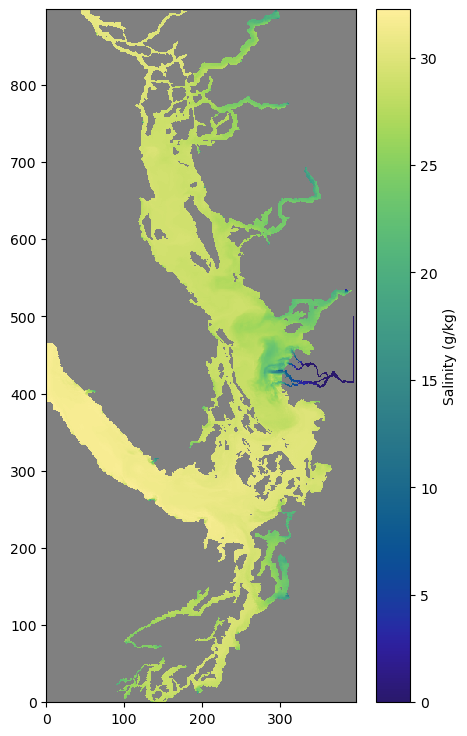

In [33]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

cmap = cm.haline
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys.vosaline[1, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)')

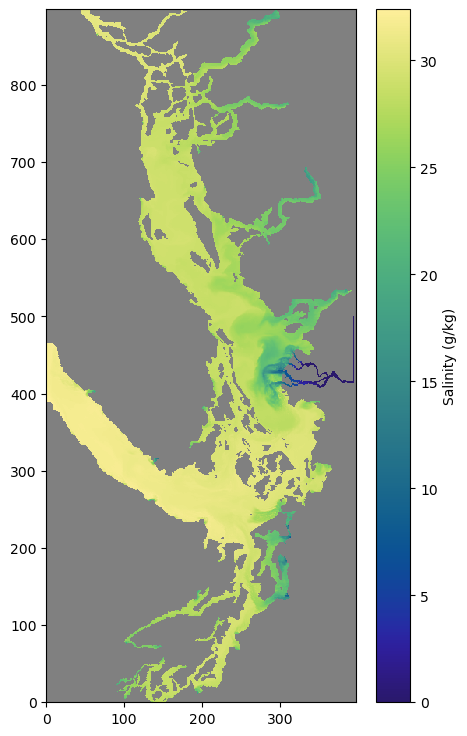

In [34]:
cmap = cm.haline
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[1, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)')

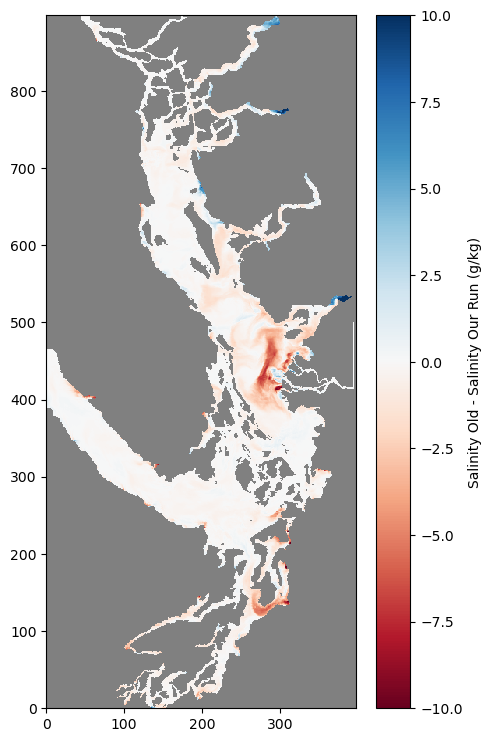

In [35]:
cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[23, 0] - phys.vosaline[23, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-10,vmax=10)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity Old - Salinity Our Run (g/kg)')

Text(0.5, 1.0, 'Timestep = 1')

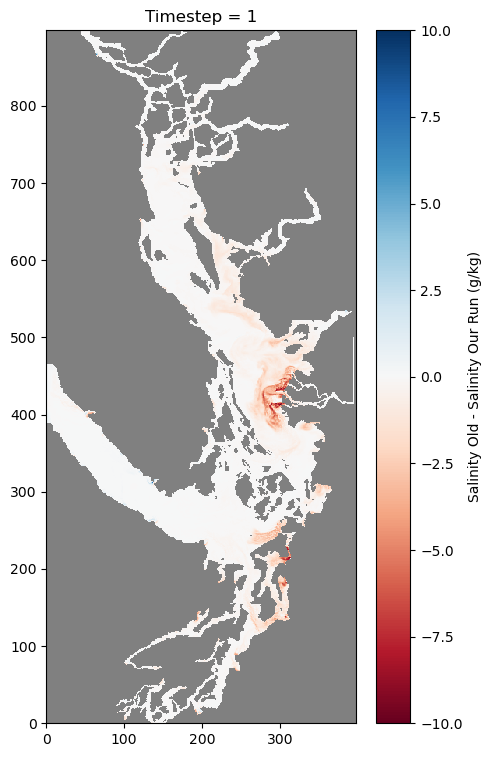

In [36]:
tstep = 1

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[tstep, 0] - phys_new.vosaline[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-10,vmax=10)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity Old - Salinity Our Run (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 5')

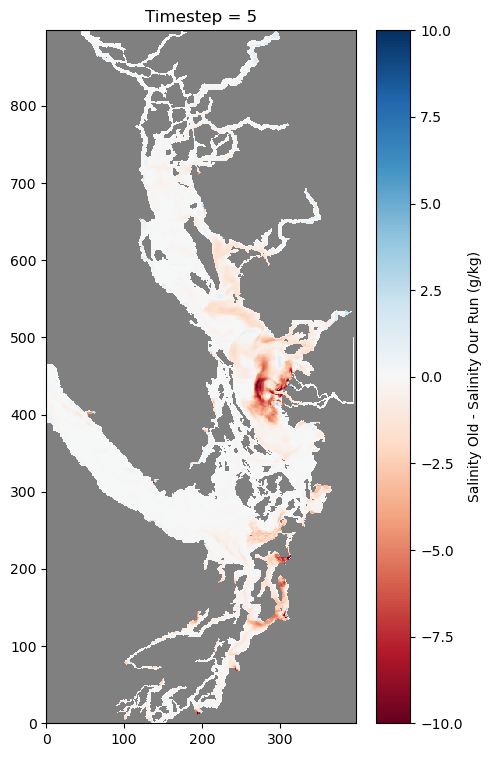

In [37]:
tstep = 5

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[tstep, 0] - phys_new.vosaline[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-10,vmax=10)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity Old - Salinity Our Run (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 10')

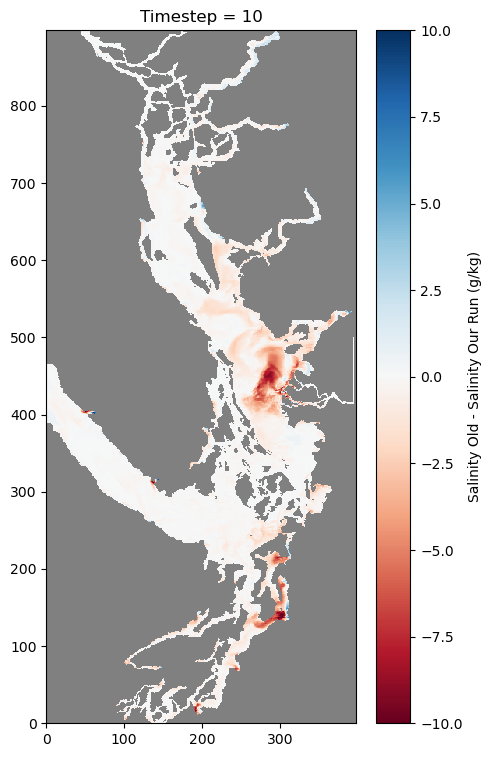

In [38]:
tstep = 10

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[tstep, 0] - phys_new.vosaline[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-10,vmax=10)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity Old - Salinity Our Run (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 15')

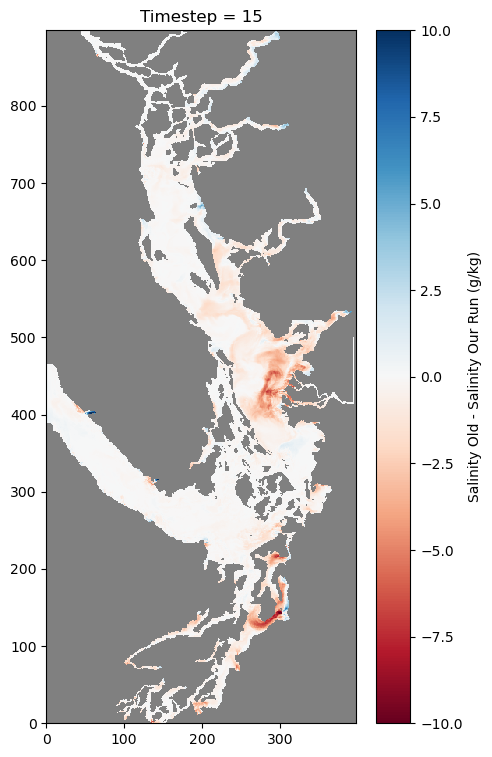

In [39]:
tstep = 15

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[tstep, 0] - phys_new.vosaline[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-10,vmax=10)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity Old - Salinity Our Run (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 20')

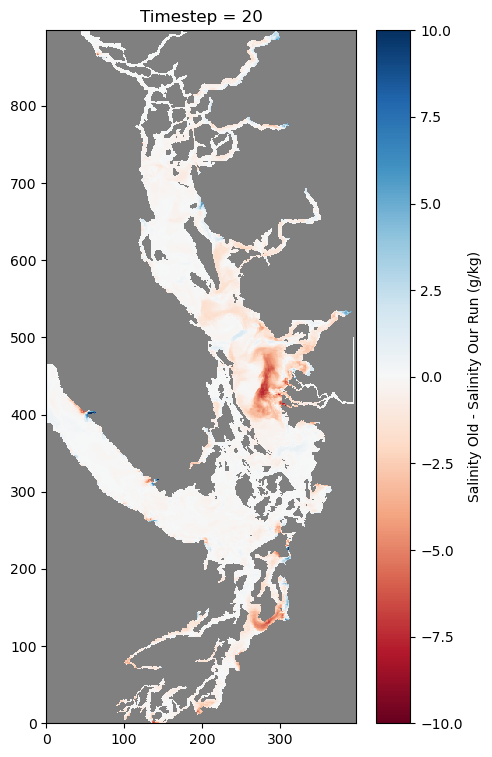

In [40]:
tstep = 20

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[tstep, 0] - phys_new.vosaline[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-10,vmax=10)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity Old - Salinity Our Run (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

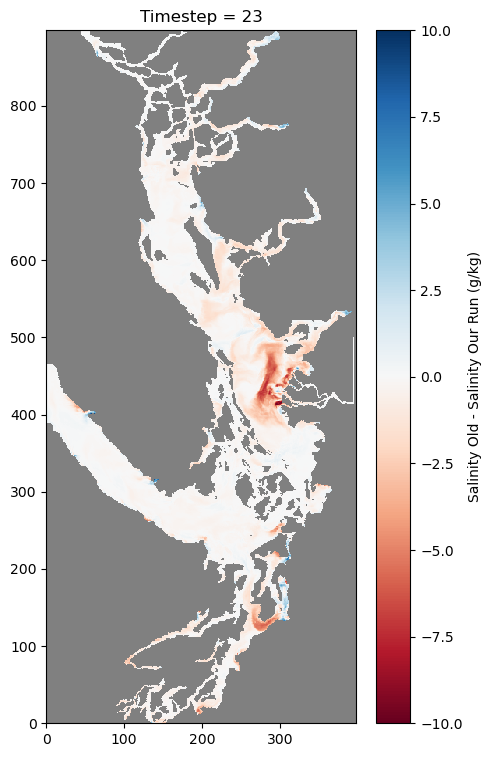

In [41]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[tstep, 0] - phys_new.vosaline[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-10,vmax=10)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity Old - Salinity Our Run (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

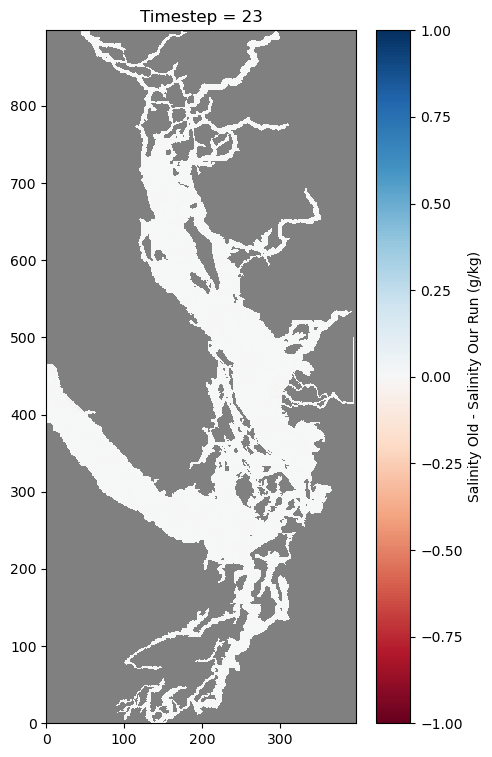

In [45]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.vosaline[tstep, 0] - phys_fix.vosaline[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-1,vmax=1)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity Old - Salinity Our Run (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))

Text(0.5, 1.0, 'Timestep = 23')

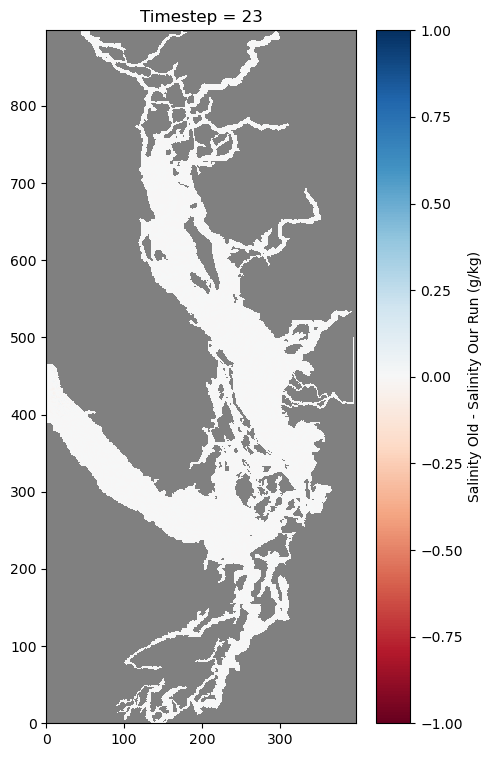

In [46]:
tstep = 23

cmap = mpl.colormaps['RdBu']
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys_old.votemper[tstep, 0] - phys_fix.votemper[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap, vmin=-1,vmax=1)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity Old - Salinity Our Run (g/kg)')
ax.set_title('Timestep = {}'.format(str(tstep)))